# Comparing Cities

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
from cleaning import cleaning_city

In [3]:
cities_list = ['Austin','Asheville','Boston','Chicago','Columbus','DC','Denver','Los Angeles','Nashville','New Orleans','NYC','Portland','San Francisco','Seattle']

In [4]:
for i in cities_list:
    cwd = 'data/{}'.format(i)
    cleaning_city(cwd,i)

In [58]:
Austin_df = pd.read_pickle('data/Austin/city_listings_combAustin.pkl')

In [60]:
Nashville_df = pd.read_pickle('data/Nashville/city_listings_combNashville.pkl')

In [61]:
SF_df = pd.read_pickle('data/San Francisco/city_listings_combSan Francisco.pkl')

In [62]:
Boston_df = pd.read_pickle('data/Boston/city_listings_combBoston.pkl')

# Comparing Austin and Nashville

Some metrics to look at:
- price per bed
- price per bedroom
- sale price
- sale price per sqft

In [11]:
Austin_df.sample()

,id,name,host_id,neighbourhood,latitude,longitude,number_of_reviews,room_type,price,availability_365,listing_url,property_type,accommodates,availability_30,bathrooms_text,bedrooms,beds,PricePerAccommodates,PricePerBedrooms
1054,4516994,5 MIN FROM ZILKER Huge 1BR SOCO Luxury FOR SXSW,6058112.0,78704.0,30.23775,-97.75741,10.0,Entire home/apt,170.0,0.0,https://www.airbnb.com/rooms/4516994,Entire apartment,5,0.0,1.0,1,3,34.0,170.0


In [12]:
Nashville_df['neighbourhood'].sample(10)

2127    District 24
3241    District 21
88       District 7
4735    District 19
1187     District 6
5643    District 19
731      District 5
1272    District 20
631     District 25
690     District 15
Name: neighbourhood, dtype: category
Categories (35, object): ['District 1', 'District 10', 'District 11', 'District 12', ..., 'District 6', 'District 7', 'District 8', 'District 9']

In [13]:
RE_df = pd.read_csv('data/REcleaned.csv')

In [14]:
Regions_df = RE_df.groupby('region_name').mean()

In [15]:
Regions_df['State'] = Regions_df.index

In [16]:
Regions_df.State.replace(".*TX.*", "TX", regex=True, inplace=True)


Travis County region_id 2866

In [17]:
RE_df.sample()

,Unnamed: 0,region_id,region_type_id,region_name,region_type,median_sale_price,median_sale_ppsf,median_pending_sqft
695754,805321,303,5,"Alameda County, CA",county,770879.1,499.642252,1496.4


In [18]:
RE_df[RE_df['region_id'] == 2866]

,Unnamed: 0,region_id,region_type_id,region_name,region_type,median_sale_price,median_sale_ppsf,median_pending_sqft
37621,43758,2866,5,"Travis County, TX",county,390000.0,219.808997,1934.5
37625,43762,2866,5,"Travis County, TX",county,341000.0,180.715198,1879.5
37627,43765,2866,5,"Travis County, TX",county,349950.0,184.583255,1813.0
37635,43774,2866,5,"Travis County, TX",county,343900.0,173.453199,1881.5
37637,43776,2866,5,"Travis County, TX",county,324250.0,185.628743,1806.0
...,...,...,...,...,...,...,...,...
596703,697813,2866,5,"Travis County, TX",county,375442.5,198.152310,1908.8
596722,697834,2866,5,"Travis County, TX",county,341811.2,188.703997,1840.9
596725,697839,2866,5,"Travis County, TX",county,358728.7,187.825572,1840.1
596727,697842,2866,5,"Travis County, TX",county,355774.0,187.597201,1825.4


In [19]:
RE_TX = Regions_df[Regions_df['State'] == 'TX']

In [20]:
RE_TX.iloc[90]

Unnamed: 0              341874
region_id                 2866
region_type_id               5
median_sale_price       360893
median_sale_ppsf       191.564
median_pending_sqft    1833.65
State                       TX
Name: Travis County, TX, dtype: object

In [21]:
travis_zips = [78764,78768,78767,78772,78769,78783,78610,78613,78615,78617,78621,73301,73344,78641,78645,78652,78654,78653,78660,78664,78669,78691,78702,78701,78704,78703,78705,78709,78712,78713,78716,78719,78722,78721,78724,78723,78726,78725,78728,78727,78730,78732,78731,78734,78733,78736,78735,78738,78737,78741,78739,78744,78742,78746,78745,78748,78747,78750,78749,78752,78751,78754,78753,78756,78758,78757,78760,78759]

In [22]:
williamson_zips = [78681,78717,78729]

-----

### Austin Airbnb Analysis

Want to make a scatter plot with:
- x-axis: # of people able to be accommodated
- y-axis: Price
- opacity: availability in the next 30 days

In [23]:
Austin_df

,id,name,host_id,neighbourhood,latitude,longitude,number_of_reviews,room_type,price,availability_365,listing_url,property_type,accommodates,availability_30,bathrooms_text,bedrooms,beds,PricePerAccommodates,PricePerBedrooms
0,2265,Zen-East in the Heart of Austin (monthly rental),2466.0,78702.0,30.27750,-97.71398,24.0,Entire home/apt,179.0,129.0,https://www.airbnb.com/rooms/2265,Entire house,4,0.0,2.0,2,2,44.750000,89.5
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028.0,78702.0,30.26112,-97.73448,536.0,Entire home/apt,95.0,360.0,https://www.airbnb.com/rooms/5456,Entire guesthouse,3,29.0,1.0,1,2,31.666667,95.0
3,5636,"Soco, Barton Springs Private Guest Cottage",7148.0,78704.0,30.24630,-97.76361,20.0,Entire home/apt,46.0,85.0,https://www.airbnb.com/rooms/5636,Entire apartment,2,11.0,1.0,1,1,23.000000,46.0
6,6448,Secluded Studio at Barton Springs,14156.0,78704.0,30.26027,-97.76503,232.0,Entire home/apt,139.0,218.0,https://www.airbnb.com/rooms/6448,Entire guesthouse,3,2.0,1.0,1,2,46.333333,139.0
7,21126,Quiet Mid Century Modern Retreat with Patio an...,80406.0,78704.0,30.24417,-97.73988,108.0,Entire home/apt,205.0,112.0,https://www.airbnb.com/rooms/21126,Entire house,5,3.0,1.0,2,2,41.000000,102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,45371687,Stylish House w/ Peaceful Deck near Downtown ATX,259870806.0,78704.0,30.23610,-97.77590,6.0,Entire home/apt,98.0,96.0,https://www.airbnb.com/rooms/45371687,Entire house,8,18.0,2.0,2,4,12.250000,49.0
9879,45410201,Urban Space w/ a Twist -Downtown in your Backyard,367220172.0,78704.0,30.25401,-97.74772,5.0,Entire home/apt,139.0,66.0,https://www.airbnb.com/rooms/45410201,Entire condominium,4,23.0,1.0,1,1,34.750000,139.0
9887,45422090,East Side Guest House with Private Outdoors Space,984468.0,78702.0,30.26924,-97.72188,8.0,Entire home/apt,94.0,35.0,https://www.airbnb.com/rooms/45422090,Entire guesthouse,2,5.0,1.0,1,1,47.000000,94.0
9905,45451216,NEW! Music Lane Tree House w/ Downtown Views,1656528.0,78704.0,30.25442,-97.74876,7.0,Entire home/apt,123.0,309.0,https://www.airbnb.com/rooms/45451216,Entire condominium,4,14.0,1.0,1,1,30.750000,123.0


In [24]:
import plotly.io as pio

In [25]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [27]:
rgba_colors = np.zeros((10,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = 2

In [28]:
Austin_df['availability_30']

0        0.0
2       29.0
3       11.0
6        2.0
7        3.0
        ... 
9854    18.0
9879    23.0
9887     5.0
9905    14.0
9927     0.0
Name: availability_30, Length: 3929, dtype: float64

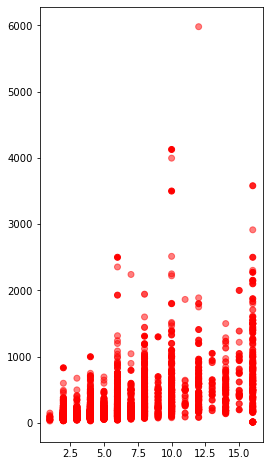

In [29]:


x = Austin_df['accommodates']
y = Austin_df['price']


plt.figure(figsize=(4,8))
#ax_scatter = plt.axes()
#ax_scatter.scatter(x, y)

alphas = ((Austin_df['availability_30']/60))+0.5
rgba_colors = np.zeros((len(alphas),4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alphas

plt.scatter(x, y, color=rgba_colors)
plt.show()

In [31]:
import seaborn as sns

In [32]:
(Austin_df['availability_30'])/60

0       0.000000
2       0.483333
3       0.183333
6       0.033333
7       0.050000
          ...   
9854    0.300000
9879    0.383333
9887    0.083333
9905    0.233333
9927    0.000000
Name: availability_30, Length: 3929, dtype: float64

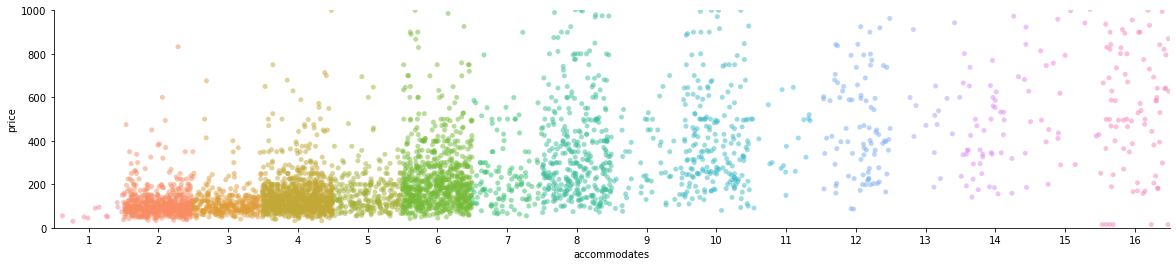

In [33]:
fig, ax = plt.subplots(figsize=(20,4))
ax.set_ylim(0,1000)
#iris = sns.load_dataset('iris')
sns.set(style="white", color_codes=True)
sns.stripplot(ax=ax,x=Austin_df['accommodates'], y=Austin_df['price'],jitter=0.5,alpha=0.5,dodge=True)
sns.despine()

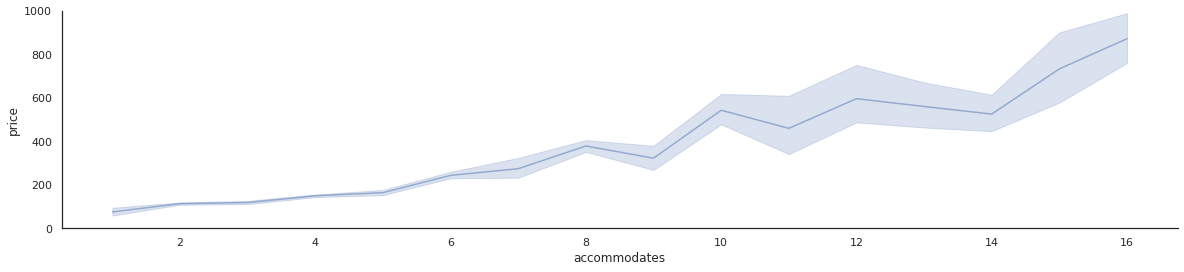

In [34]:
fig, ax = plt.subplots(figsize=(20,4))
ax.set_ylim(0,1000)
#iris = sns.load_dataset('iris')
sns.set(style="white", color_codes=True)
sns.lineplot(ax=ax,x=Austin_df['accommodates'], y=Austin_df['price'],alpha=0.5)
sns.despine()

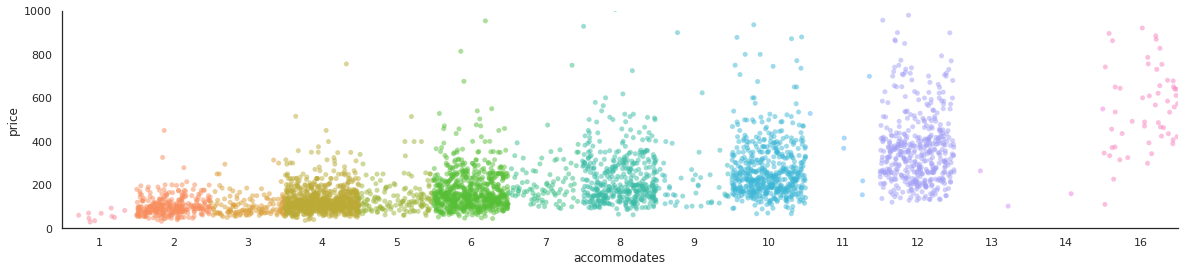

In [35]:
fig, ax = plt.subplots(figsize=(20,4))
ax.set_ylim(0,1000)
#iris = sns.load_dataset('iris')
sns.set(style="white", color_codes=True)
sns.stripplot(ax=ax,x=Nashville_df['accommodates'], y=Nashville_df['price'],jitter=0.5,alpha=0.5,dodge=True)
sns.despine()

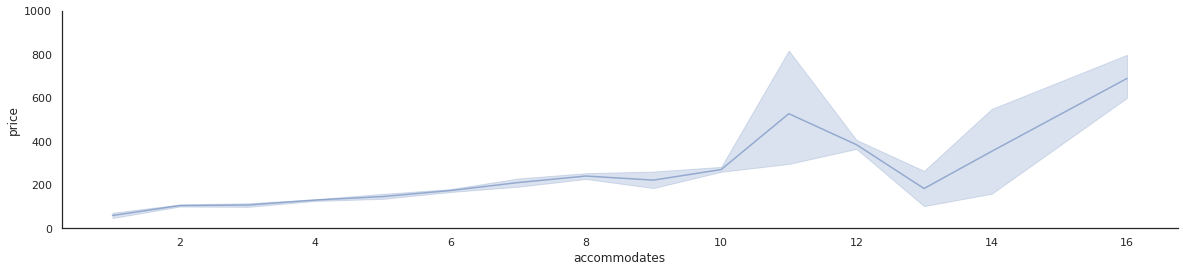

In [36]:
fig, ax = plt.subplots(figsize=(20,4))
ax.set_ylim(0,1000)
#iris = sns.load_dataset('iris')
sns.set(style="white", color_codes=True)
sns.lineplot(ax=ax,x=Nashville_df['accommodates'], y=Nashville_df['price'],alpha=0.5)
sns.despine()

Travis County: (October 2020)
- median price per sqft = 223

Davidson County: (October 2020)
- median price per sqft = 198

In [37]:
plt.style.use('ggplot')

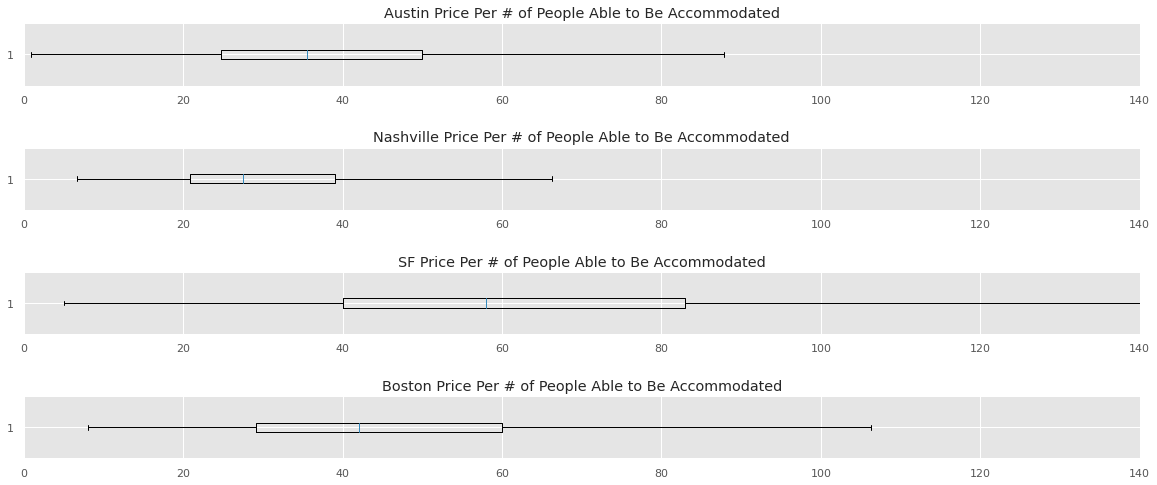

In [38]:
fig1, ax1 = plt.subplots(4,figsize=(20,8))
plt.subplots_adjust(hspace=1)
ax1[0].set_xlim(0,140)
ax1[1].set_xlim(0,140)
ax1[2].set_xlim(0,140)
ax1[3].set_xlim(0,140)
ax1[0].set_title('Austin Price Per # of People Able to Be Accommodated')
ax1[0].boxplot(Austin_df['PricePerAccommodates'],vert=False,showfliers=False);
ax1[1].set_title('Nashville Price Per # of People Able to Be Accommodated')
ax1[1].boxplot(Nashville_df['PricePerAccommodates'],vert=False,showfliers=False);
ax1[2].set_title('SF Price Per # of People Able to Be Accommodated')
ax1[2].boxplot(SF_df['PricePerAccommodates'],vert=False,showfliers=False);
ax1[3].set_title('Boston Price Per # of People Able to Be Accommodated')
ax1[3].boxplot(Boston_df['PricePerAccommodates'],vert=False,showfliers=False);
plt.savefig('img/comparingPrices')

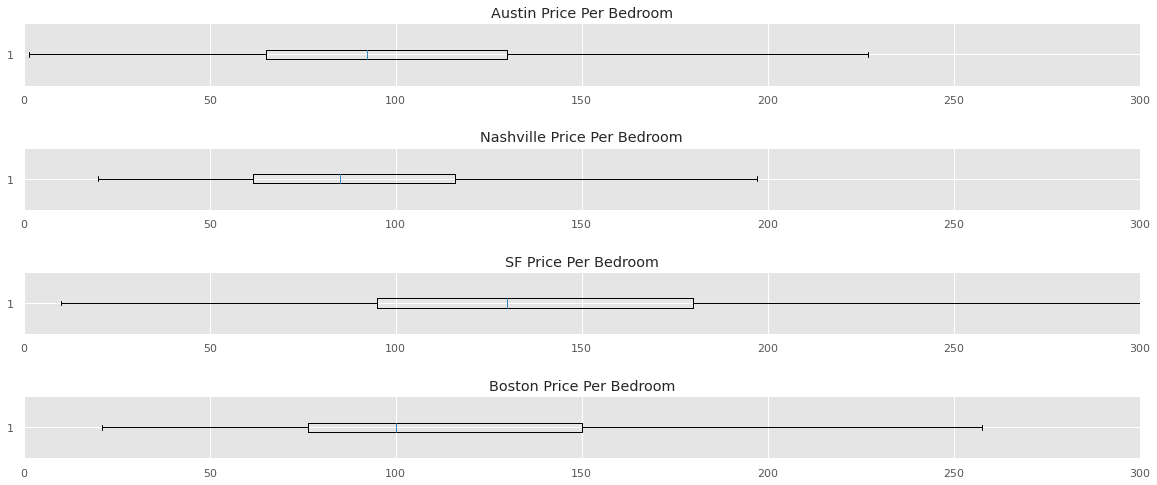

In [39]:
fig1, ax1 = plt.subplots(4,figsize=(20,8))
plt.subplots_adjust(hspace=1)
ax1[0].set_xlim(0,300)
ax1[1].set_xlim(0,300)
ax1[2].set_xlim(0,300)
ax1[3].set_xlim(0,300)
ax1[0].set_title('Austin Price Per Bedroom')
ax1[0].boxplot(Austin_df['PricePerBedrooms'],vert=False,showfliers=False);
ax1[1].set_title('Nashville Price Per Bedroom')
ax1[1].boxplot(Nashville_df['PricePerBedrooms'],vert=False,showfliers=False);
ax1[2].set_title('SF Price Per Bedroom')
ax1[2].boxplot(SF_df['PricePerBedrooms'],vert=False,showfliers=False);
ax1[3].set_title('Boston Price Per Bedroom')
ax1[3].boxplot(Boston_df['PricePerBedrooms'],vert=False,showfliers=False);
plt.savefig('img/comparingPricesPerBedroom')

In [40]:
Austin_df.sample()

,id,name,host_id,neighbourhood,latitude,longitude,number_of_reviews,room_type,price,availability_365,listing_url,property_type,accommodates,availability_30,bathrooms_text,bedrooms,beds,PricePerAccommodates,PricePerBedrooms
508,1681072,Cool Off in the Pool at This Zilker Park Oasis,18253226.0,78704.0,30.25875,-97.77284,101.0,Entire home/apt,678.0,329.0,https://www.airbnb.com/rooms/1681072,Entire house,8,18.0,3.0,4,5,84.75,169.5


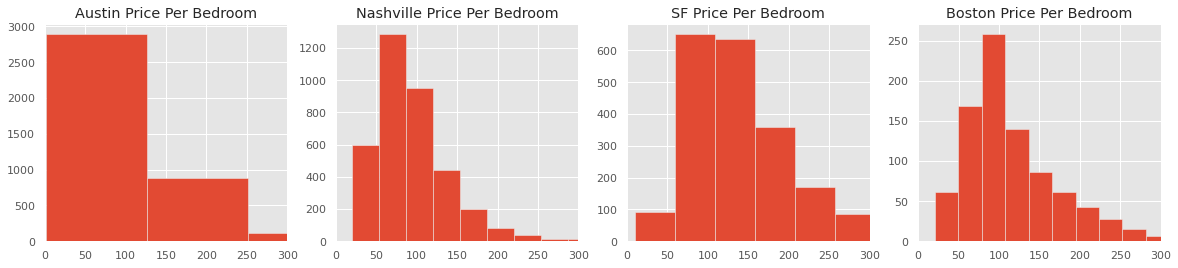

In [41]:
fig1, ax1 = plt.subplots(1,4,figsize=(20,4))
plt.subplots_adjust(hspace=1)
ax1[0].set_xlim(0,300)
ax1[1].set_xlim(0,300)
ax1[2].set_xlim(0,300)
ax1[3].set_xlim(0,300)
ax1[0].set_title('Austin Price Per Bedroom')
ax1[0].hist(Austin_df['PricePerBedrooms'],bins=20);
ax1[1].set_title('Nashville Price Per Bedroom')
ax1[1].hist(Nashville_df['PricePerBedrooms'],bins=20);
ax1[2].set_title('SF Price Per Bedroom')
ax1[2].hist(SF_df['PricePerBedrooms'],bins=20);
ax1[3].set_title('Boston Price Per Bedroom')
ax1[3].hist(Boston_df['PricePerBedrooms'],bins=20);
plt.savefig('img/comparingPricesPerBedroom')

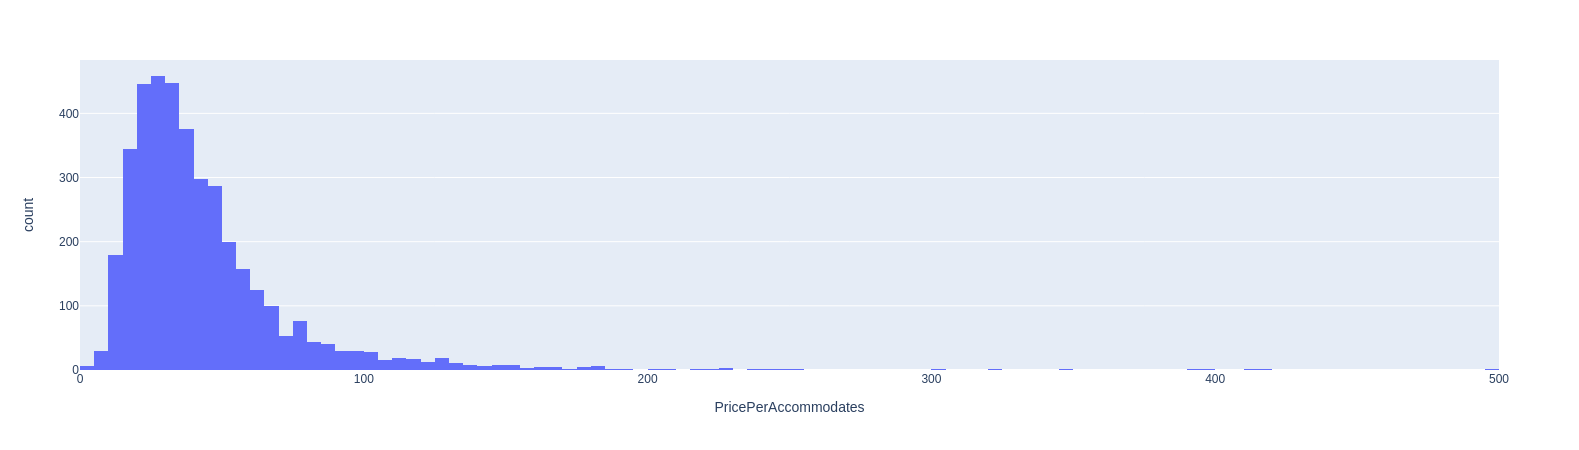

In [42]:
fig = px.histogram(Austin_df,x='PricePerAccommodates')
fig.show()

In [43]:
Nashville_df['PricePerAccommodates'].sort_values(ascending=False).head(20)

217     229.166667
1805    225.000000
4561    189.000000
3440    187.500000
1678    187.500000
1496    163.000000
2787    159.000000
751     157.375000
3201    139.500000
1551    135.666667
1897    131.250000
81      130.833333
2953    128.750000
1569    125.875000
1284    118.909091
3353    116.125000
389     112.666667
89      112.500000
3128    111.916667
1002    111.833333
Name: PricePerAccommodates, dtype: float64

In [44]:
ATXNVSF = pd.concat([Austin_df,Nashville_df,SF_df])

In [45]:
ATXNVSF

,id,name,host_id,neighbourhood,latitude,longitude,number_of_reviews,room_type,price,availability_365,listing_url,property_type,accommodates,availability_30,bathrooms_text,bedrooms,beds,PricePerAccommodates,PricePerBedrooms
0,2265,Zen-East in the Heart of Austin (monthly rental),2466.0,78702,30.27750,-97.71398,24.0,Entire home/apt,179.0,129.0,https://www.airbnb.com/rooms/2265,Entire house,4,0.0,2.0,2,2,44.750000,89.5
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028.0,78702,30.26112,-97.73448,536.0,Entire home/apt,95.0,360.0,https://www.airbnb.com/rooms/5456,Entire guesthouse,3,29.0,1.0,1,2,31.666667,95.0
3,5636,"Soco, Barton Springs Private Guest Cottage",7148.0,78704,30.24630,-97.76361,20.0,Entire home/apt,46.0,85.0,https://www.airbnb.com/rooms/5636,Entire apartment,2,11.0,1.0,1,1,23.000000,46.0
6,6448,Secluded Studio at Barton Springs,14156.0,78704,30.26027,-97.76503,232.0,Entire home/apt,139.0,218.0,https://www.airbnb.com/rooms/6448,Entire guesthouse,3,2.0,1.0,1,2,46.333333,139.0
7,21126,Quiet Mid Century Modern Retreat with Patio an...,80406.0,78704,30.24417,-97.73988,108.0,Entire home/apt,205.0,112.0,https://www.airbnb.com/rooms/21126,Entire house,5,3.0,1.0,2,2,41.000000,102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6714,44232692,San Francisco Victorian House 20 mins from SFO,281580705.0,Bayview,37.74025,-122.38898,5.0,Entire home/apt,276.0,363.0,https://www.airbnb.com/rooms/44232692,Entire house,16,28.0,1.5,4,8,17.250000,69.0
6717,44262841,Newly built Bernal Heights InLaw w/ Outdoor Space,155667185.0,Bernal Heights,37.74666,-122.40550,7.0,Entire home/apt,119.0,0.0,https://www.airbnb.com/rooms/44262841,Entire guest suite,4,0.0,1.0,1,2,29.750000,119.0
6732,44394083,Beautiful 3 Bedroom next to Sunset ocean beach,325403153.0,Parkside,37.74068,-122.49658,6.0,Entire home/apt,216.0,331.0,https://www.airbnb.com/rooms/44394083,Entire house,7,12.0,2.0,3,3,30.857143,72.0
6813,44966218,Stunning Home in North Beach,363004359.0,North Beach,37.80526,-122.41113,5.0,Entire home/apt,371.0,40.0,https://www.airbnb.com/rooms/44966218,Entire apartment,4,17.0,2.0,2,2,92.750000,185.5


In [46]:
PPAmedians = Austin_df.groupby('neighbourhood')['PricePerAccommodates'].median();

In [47]:
PPAmedians.index

CategoricalIndex([78701.0, 78702.0, 78703.0, 78704.0, 78705.0, 78712.0,
                  78717.0, 78719.0, 78721.0, 78722.0, 78723.0, 78724.0,
                  78725.0, 78726.0, 78727.0, 78728.0, 78729.0, 78730.0,
                  78731.0, 78732.0, 78733.0, 78734.0, 78735.0, 78736.0,
                  78737.0, 78738.0, 78739.0, 78741.0, 78742.0, 78744.0,
                  78745.0, 78746.0, 78747.0, 78748.0, 78749.0, 78750.0,
                  78751.0, 78752.0, 78753.0, 78754.0, 78756.0, 78757.0,
                  78758.0, 78759.0],
                 categories=[78701.0, 78702.0, 78703.0, 78704.0, 78705.0, 78712.0, 78717.0, 78719.0, ...], ordered=False, name='neighbourhood', dtype='category')

NOTE: AUSppsf obtained manually and not all information is completely up to date.  Some zip codes have the most recent info from March.

In [48]:
AUSppsf = {78701:582,78702:443,78703:456,78704:440,78705:399,78712:457,78717:166,78719:175,78721:346,78722:380,78723:280,78724:168,78725:163,78726:185,78727:217,78728:183,78729:181,78730:258,78731:303,78732:199,78733:287,78734:225,78735:255,78736:223,78737:196,78738:204,78739:193,78741:276,78742:306,78744:183,78745:264,78746:362,78747:154,78748:195,78749:215,78750:211,78751:413,78752:298,78753:199,78754:149,78756:396,78757:345,78758:225,78759:248}

In [49]:
AUSppsf_df = pd.DataFrame.from_dict(AUSppsf,orient='index',columns=['mean_ppsf'])

In [50]:
AUSppsf_df.reset_index(inplace=True)

In [51]:
AUSppsf_df.rename(columns={"index":'zip'},inplace=True)
AUSppsf_df

,zip,mean_ppsf
0,78701,582
1,78702,443
2,78703,456
3,78704,440
4,78705,399
5,78712,457
6,78717,166
7,78719,175
8,78721,346
9,78722,380


In [52]:
AUSppsf_df.to_pickle('data/AUSppsf_df.pkl')

<BarContainer object of 44 artists>

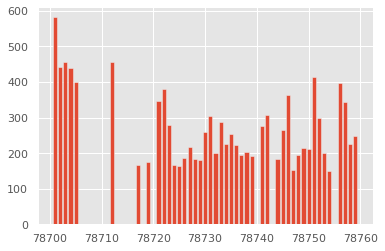

In [53]:
plt.bar(x=AUSppsf.keys(),height=AUSppsf.values())

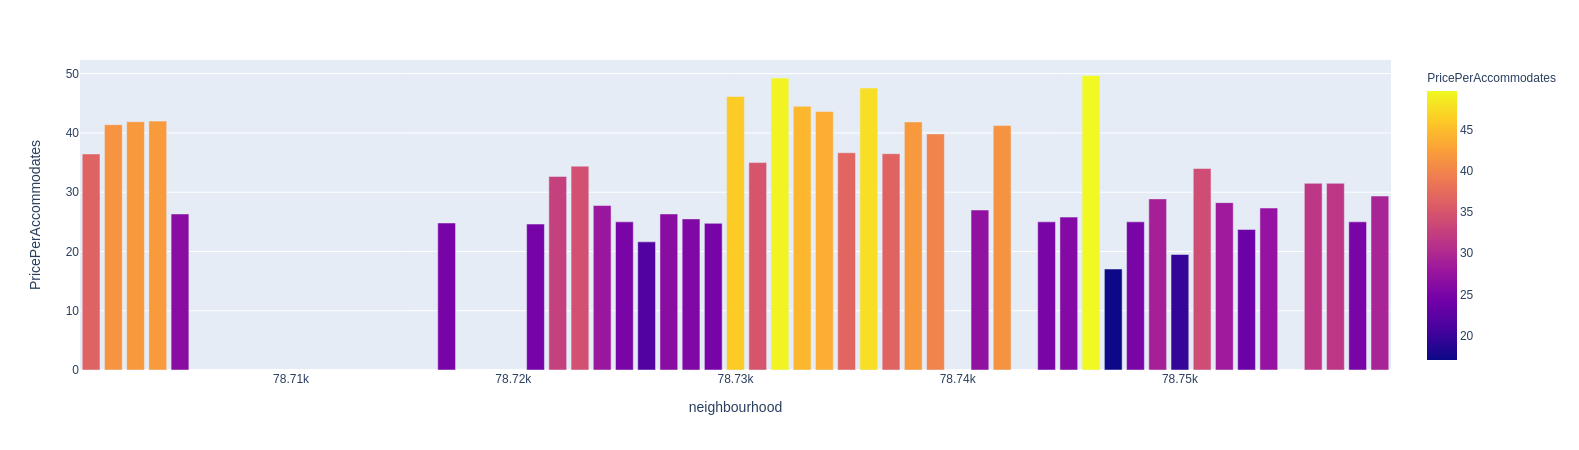

In [54]:
fig = px.bar(PPAmedians,x=PPAmedians.index,y='PricePerAccommodates',color='PricePerAccommodates')
fig.show()

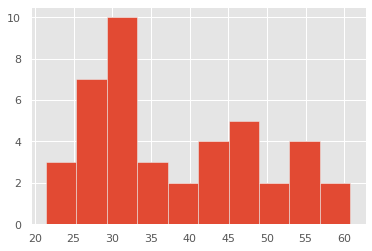

In [55]:
Austin_df.groupby('neighbourhood')['PricePerAccommodates'].mean().hist();

In [66]:
basic_df = pd.read_csv('data/basicinfo.csv')

In [68]:
basic_df.set_index('index',inplace=True)

In [69]:
basic_df

,Austin,Nashville,San Francisco,Boston
index,,,,
ppsf,155.564006,147.460914,9.468968e+02,277.058519
sale_price,312175.500000,290000.000000,1.381250e+06,484248.700000
number_of_rentals,3929.000000,3646.000000,2.097000e+03,902.000000
nightly_price,157.000000,165.000000,2.000000e+02,157.500000
